In [32]:
from __future__ import print_function, division
from scipy import stats as st
import numpy as np
import pandas as pd
import numpy.random as rd
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

sns.set(style="whitegrid", palette="muted", color_codes=True) 

In [2]:
def check_prime(x):
    i = 2
    prime_factors = []
    while x > 1:
        if x % i == 0:
            prime_factors.append(i)
            x = x / i
        else:
            i += 1
    return prime_factors

In [33]:
rd.seed(71)
n_row = 3
n_col = 33
max_num = n_row*n_col

prime_list = []
result_dict = {}
for i in range(n_row * n_col):
    x = i+2 #rd.randint(low=0, high=max_num)
    result = check_prime(x)
    print(x, Counter(result))
    if len(result) == 1:
        prime_list.append(result[0])

    result_dict[x] = Counter(result)

2 Counter({2: 1})
3 Counter({3: 1})
4 Counter({2: 2})
5 Counter({5: 1})
6 Counter({2: 1, 3: 1})
7 Counter({7: 1})
8 Counter({2: 3})
9 Counter({3: 2})
10 Counter({2: 1, 5: 1})
11 Counter({11: 1})
12 Counter({2: 2, 3: 1})
13 Counter({13: 1})
14 Counter({2: 1, 7: 1})
15 Counter({3: 1, 5: 1})
16 Counter({2: 4})
17 Counter({17: 1})
18 Counter({3: 2, 2: 1})
19 Counter({19: 1})
20 Counter({2: 2, 5: 1})
21 Counter({3: 1, 7: 1})
22 Counter({2: 1, 11: 1})
23 Counter({23: 1})
24 Counter({2: 3, 3: 1})
25 Counter({5: 2})
26 Counter({2: 1, 13: 1})
27 Counter({3: 3})
28 Counter({2: 2, 7: 1})
29 Counter({29: 1})
30 Counter({2: 1, 3: 1, 5: 1})
31 Counter({31: 1})
32 Counter({2: 5})
33 Counter({11: 1, 3: 1})
34 Counter({17: 1, 2: 1})
35 Counter({5: 1, 7: 1})
36 Counter({2: 2, 3: 2})
37 Counter({37: 1})
38 Counter({2: 1, 19: 1})
39 Counter({3: 1, 13: 1})
40 Counter({2: 3, 5: 1})
41 Counter({41: 1})
42 Counter({2: 1, 3: 1, 7: 1})
43 Counter({43: 1})
44 Counter({2: 2, 11: 1})
45 Counter({3: 2, 5: 1})
46 Co

In [31]:
print(len(prime_list))
prime_list

25


[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

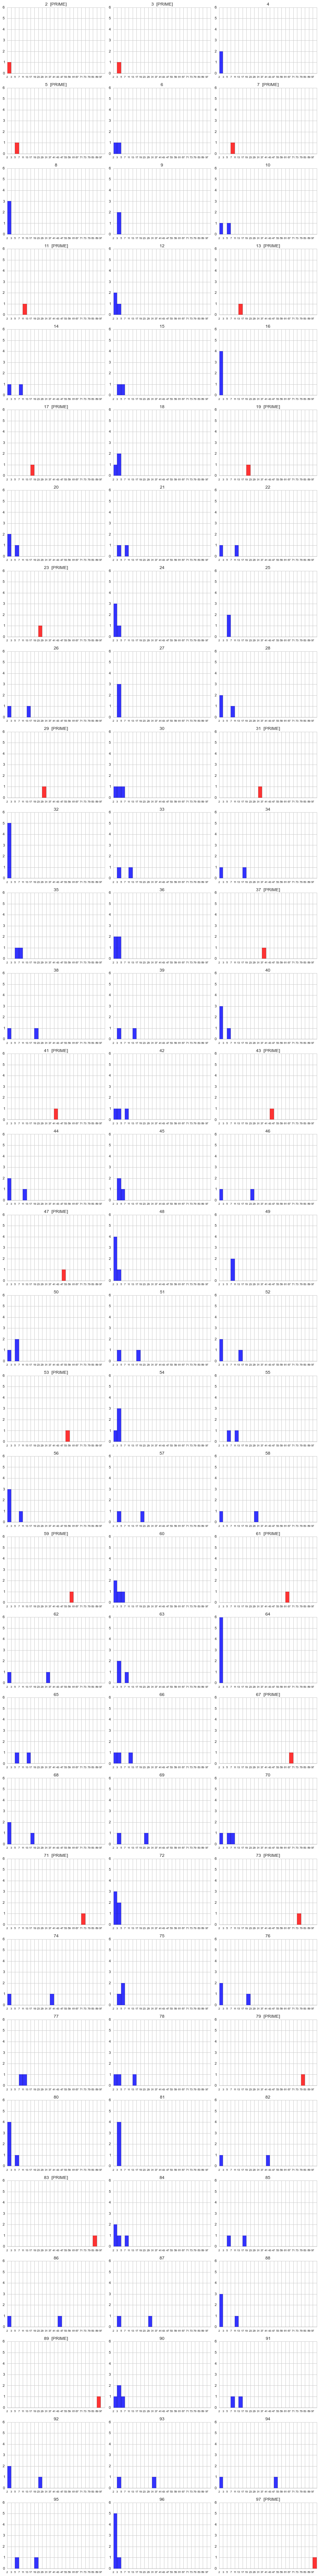

In [66]:
## 2-100までの自然数

plt.figure(figsize=(4*n_row, 3*n_col))
for n in range(2, n_row * n_col -1):
    plt.subplot(n_col, n_row, n-1)
    prime_flg = True if n in prime_list else False
    plt.bar(range(25), [result_dict[n][i] for i in prime_list], width=1, alpha=0.8, 
            color="red" if prime_flg else "blue")
    
    plt.title("{} {}".format(n, " [PRIME]" if prime_flg else ""))
    plt.xticks(range(25), prime_list, size=8)
    plt.ylim(0, 6)

plt.tight_layout()
plt.show()

### 最大公約数

In [219]:
def check_each_min(n1, n2):
    return np.array([min(result_dict[n1][i], result_dict[n2][i]) for i in prime_list], dtype=np.int)

def check_each_max(n1, n2):
    return np.array([max(result_dict[n1][i], result_dict[n2][i]) for i in prime_list], dtype=np.int)

def get_greatest_common_divisor(n1, n2):
    tmp = np.array([ x**y for x, y in zip(prime_list, check_each_min(n1, n2))])
    tmp = tmp[tmp != 0]
    return np.prod(tmp)


def get_least_common_multiple(n1, n2):
    tmp = np.array([ x**y for x, y in zip(prime_list, check_each_max(n1, n2))])
    tmp = tmp[tmp != 0]
    return np.prod(tmp)


def plot_pair_number(n1, n2):
    assert n1 <= 100 and n2 <= 100
    plt.bar(range(25), [result_dict[n1][i] for i in prime_list], width=1, alpha=0.8, color="blue")
    plt.bar(range(25), [-result_dict[n2][i] for i in prime_list], width=1, alpha=0.8, color="green")
    plt.title("n1:{}, n2:{}".format(n1, n2))
    
    
    y_min = min(-2, -max(result_dict[n2].values()))
    y_max = max(2, max(result_dict[n1].values()))
    
    plt.yticks(range(y_min-1, y_max+2))
    
    #plt.yticks()
    plt.xticks(range(25), prime_list, size=8)
    
    plt.show()
    

def plot_gcd(n1, n2):
    res = check_each_min(n1, n2)
    y_max = max(2, max(res)+1)
    y_min = min(-2, -max(res)-1)
    plt.yticks(range(y_min-1, y_max+2))
    plt.ylim(y_min, y_max)
    
    plt.bar(range(len(prime_list)), res, width=1, alpha=0.8, color="blue")
    plt.bar(range(len(prime_list)), -res, width=1, alpha=0.8, color="green")
    plt.xticks(range(25), prime_list, size=8)
    plt.title("gcd of ({},{}), gcd:{}".format(n1, n2, get_greatest_common_divisor(n1, n2)))
    plt.show()    


def plot_lcm(n1, n2):
    res = check_each_max(n1, n2)
    y_max = max(2, max(res)+1)
    y_min = min(-2, -max(res)-1)
    plt.yticks(range(y_min-1, y_max+2))
    plt.ylim(y_min, y_max)
    
    plt.bar(range(len(prime_list)), res, width=1, alpha=0.8, color="blue")
    plt.bar(range(len(prime_list)), -res, width=1, alpha=0.8, color="green")
    plt.xticks(range(25), prime_list, size=8)
    plt.title("gcd of ({},{}), lcm:{}".format(n1, n2, get_least_common_multiple(n1, n2)))
    plt.show()    

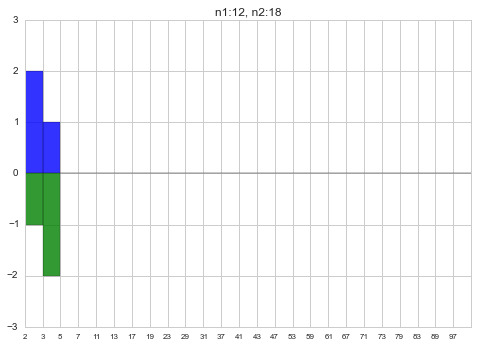

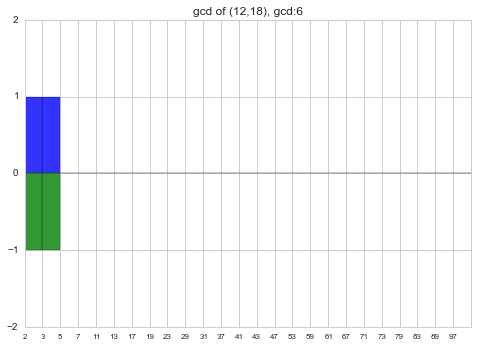

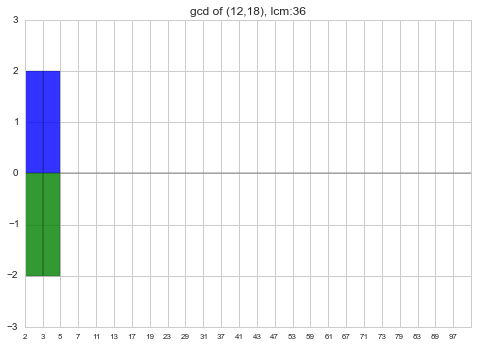

In [220]:
# check whether to exist greatest common divisor
# 最大公約数の見つけ方

# n1:上半分、n2:下半分のグラフに素因数毎の個数が記載されています。
# 例) n1:12, n2:18
#     12は 2*2*3なので、2のところに目盛り2の棒グラフが、3のところに目盛り3の棒グラフがあります。
#     この棒がおなじ列に上と下両方ある場合、公約数があります。この場合、2と3のところにそれぞれ棒があり
#     少なくとも1本ずつ存在しているので、2が1つ、3が1つで掛け合わせて6が最大公約数になります。

n1 = 12
n2 = 18
plot_pair_number(n1, n2)
plot_gcd(n1, n2)
plot_lcm(n1, n2)



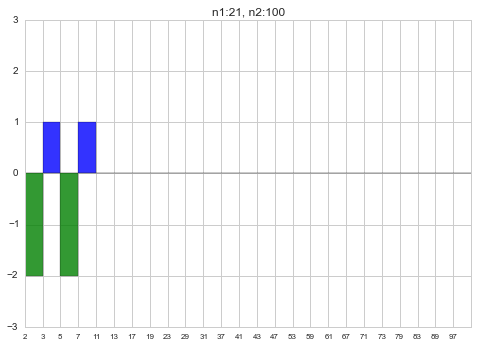

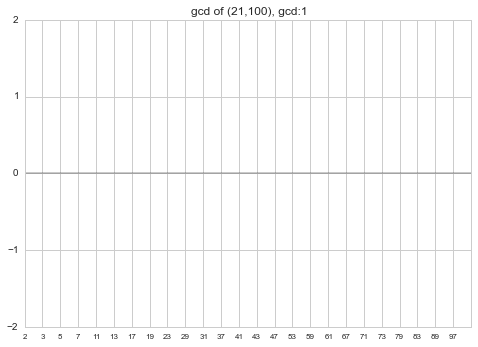

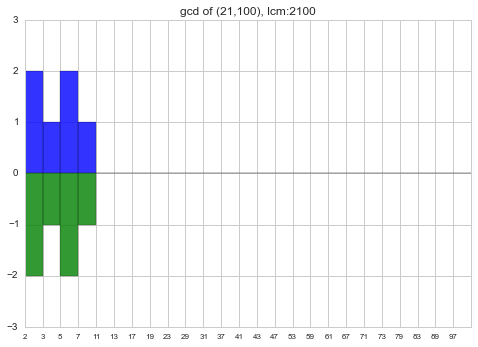

In [221]:
# 例) n1:21, n2:100
#     21と100はおなじ列に棒がありませんので、公約数はありません。

n1 = 21
n2 = 100
plot_pair_number(n1, n2)
plot_gcd(n1, n2)
plot_lcm(n1, n2)

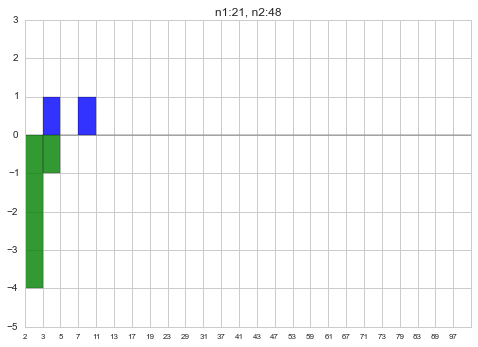

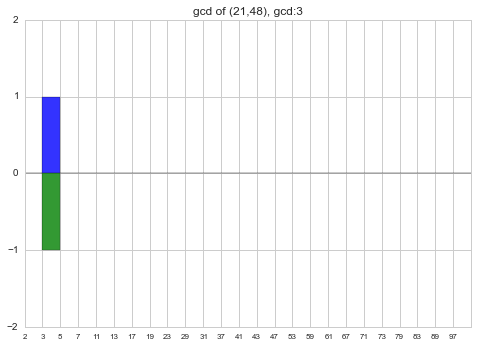

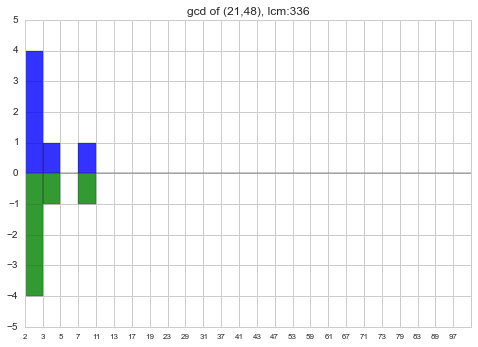

In [222]:
# 例) n1:21, n2:48
#     21と48は、3が唯一共通しているので3が最大公約数

n1 = 21
n2 = 48
plot_pair_number(n1, n2)
plot_gcd(n1, n2)
plot_lcm(n1, n2)

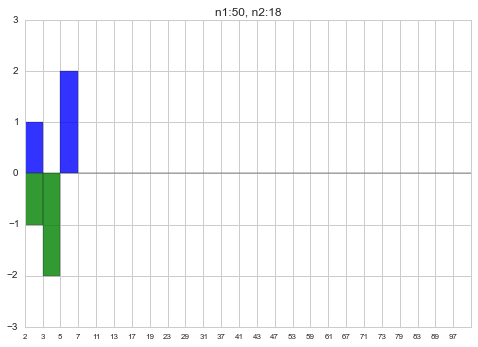

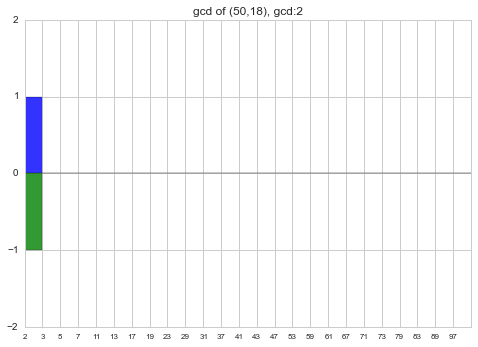

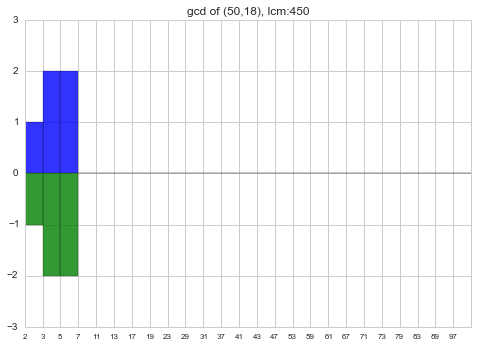

In [230]:
# check whether to exist greatest common divisor
# ex: ramdom
n1 = rd.randint(2,100)
n2 = rd.randint(2,100)

plot_pair_number(n1, n2)
plot_gcd(n1, n2)
plot_lcm(n1, n2)